In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
df=pd.read_csv(r"C:\Users\smrc\OneDrive\Desktop\WELFake_Dataset.csv")

In [13]:
#head
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [15]:
#tail
df.tail()

,Unnamed: 0,title,text,label
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0
72133,72133,Goldman Sachs Endorses Hillary Clinton For Pre...,Goldman Sachs Endorses Hillary Clinton For Pre...,1


In [17]:
df.shape

(72134, 4)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [26]:
#check for missing values
df.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [29]:
#check for duplicates
df.duplicated().sum()

0

In [44]:
#check for garbage values for the object type
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

title
Factbox: Trump fills top jobs for his administration                                                  14
Get Ready For Civil Unrest: Survey Finds That Most Americans Are Concerned About Election Violence     8
Highlights: The Trump presidency on April 13 at 9:30 P.M. EDT/0130 GMT on Friday                       8
Factbox: Contenders for senior jobs in Trump's administration                                          8
Michael Moore Owes Me $4.99                                                                            7
                                                                                                      ..
Population of Vertebrate Animals Fell 58% From 1970-2012                                               1
Italy's Renzi pledges to hike budget deficit if he wins election                                       1
Motion Picture Academy, After Diversifying, Keeps Leadership Intact - The New York Times               1
Donald Trump, Delhi, Theresa May: Your Monday Bri

In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,72134.0,36066.500000,20823.436496,0.0,18033.25,36066.5,54099.75,72133.0
label,72134.0,0.514404,0.499796,0.0,0.00,1.0,1.00,1.0


In [54]:
df.describe(include="object")

,title,text
count,71576,72095
unique,62347,62718
top,Factbox: Trump fills top jobs for his administ...,
freq,14,738


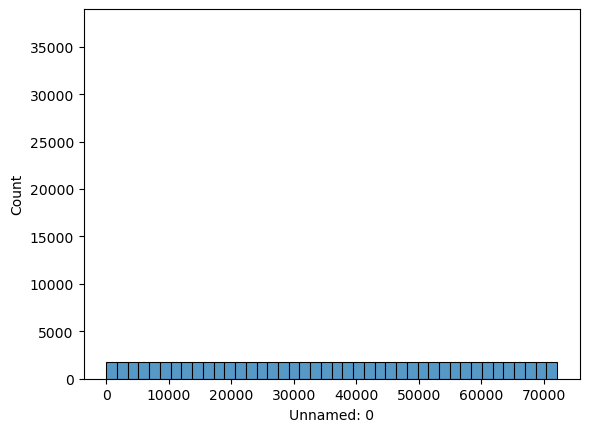

In [62]:
#histogram to understand the distribution
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
plt.show()

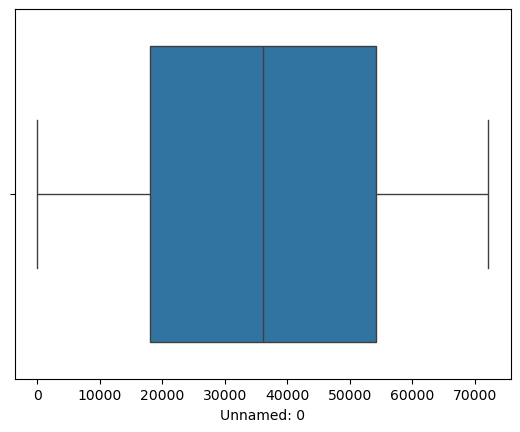

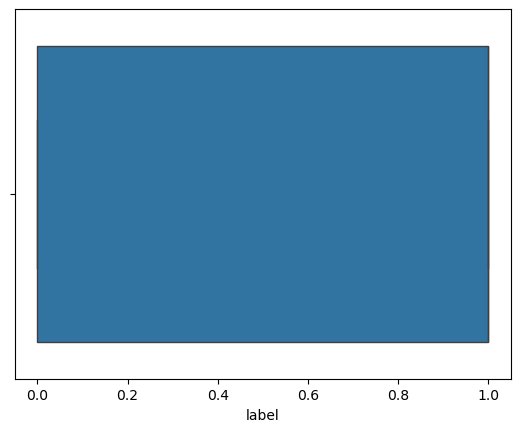

In [69]:
#boxplot to identify outliers
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [73]:
df.select_dtypes(include="number").columns

Index(['Unnamed: 0', 'label'], dtype='object')

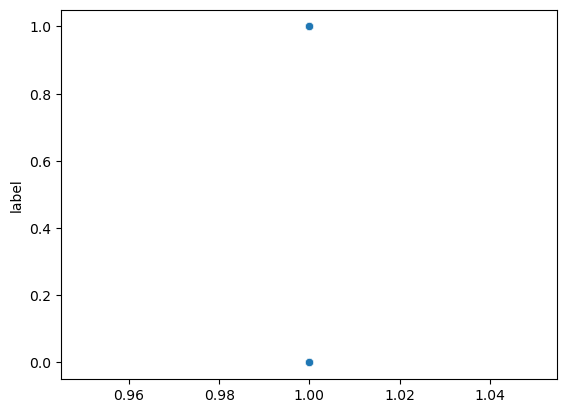

In [78]:
#scatterplot to understand collinearity
for i in ['Unnamed: 0']:
    sns.scatterplot(data=df,x=1,y='label')
    plt.show()

In [81]:
#correlation with heatmap to interprate the relation and multicolliniariy
s=df.select_dtypes(include="number").corr()

<Axes: >

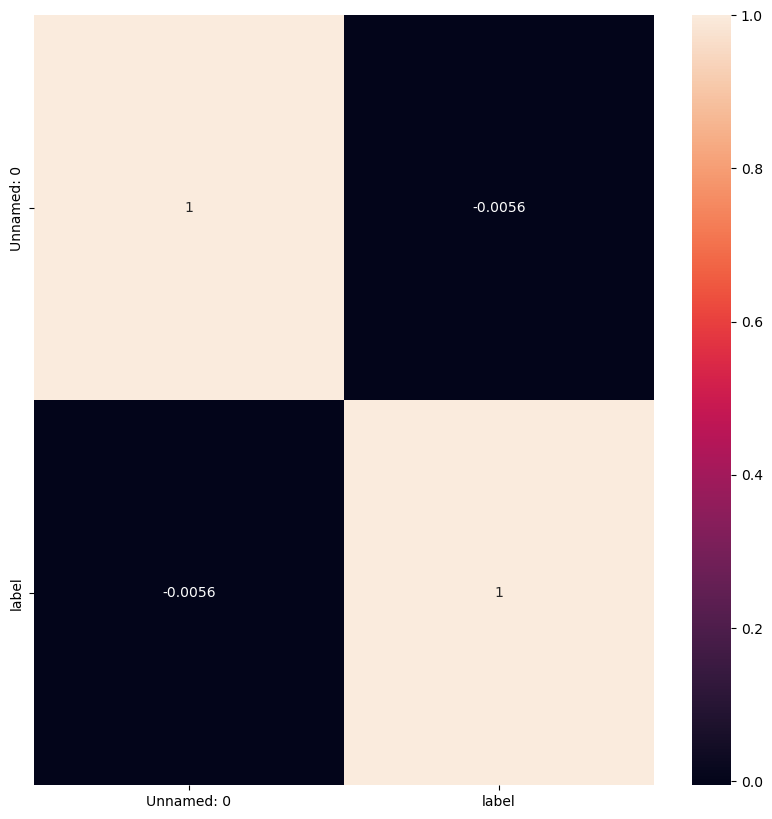

In [128]:
plt.figure(figsize=(10,10))
sns.heatmap(s,annot=True)

In [89]:
#handling missing values
df.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [96]:
#since they are categorical data fill them with mode
for i in["title","text"]:
    df[i]=df[i].fillna(df[i].mode())

In [100]:
df.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [109]:
#since they are categorical data fill them with mode
for i in["title","text"]:
    df[i]=df[i].fillna(df[i].mode()[0])

In [111]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [115]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[df.select_dtypes(include="number").columns] = scaler.fit_transform(df.select_dtypes(include="number"))


In [123]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['title'] = le.fit_transform(df['title'].astype(str))  # Convert NaNs to string
df['text'] = le.fit_transform(df['text'].astype(str))


In [134]:
print(df.describe())  # Check min, max, mean, etc.


         Unnamed: 0         title          text         label
count  72134.000000  72134.000000  72134.000000  72134.000000
mean       0.500000  31582.551099  30789.753057      0.514404
std        0.288681  17751.528767  18341.872095      0.499796
min        0.000000      0.000000      0.000000      0.000000
25%        0.250000  16282.250000  14887.250000      0.000000
50%        0.500000  31408.500000  30754.500000      1.000000
75%        0.750000  46926.750000  46556.750000      1.000000
max        1.000000  62346.000000  62717.000000      1.000000


In [125]:
print(df[['title', 'text']].head())  # Display first few rows


   title   text
0  32786  34016
1  23713  16056
2  56848   1431
3  14758   5257
4  44281  45159
